In [14]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [35]:
DATASET_DIR="dataset"
LANGS=['en','hi']
SR=22050

In [16]:
df=pd.read_csv('final_dataset.csv')
df.columns

Index(['Unnamed: 0', 'id', 'text', 'text_hi'], dtype='object')

In [17]:
df=df[['id', 'text', 'text_hi']]

In [18]:
df

,id,text,text_hi
0,tnTPaLOaHz8_0,No!,नहीं!
1,tnTPaLOaHz8_4,Don't cry.,रोओ मत।
2,mwKJfNYwvm8_5,Water!,पानी!
3,J_z-W4UVHkw_9,"Three, two, one, go!","तीन, दो, एक, जाओ!"
4,J_z-W4UVHkw_13,Hurry up.\nThe wall is closing!,जल्दी करो।\nदीवार बंद हो रही है!
...,...,...,...
8145,3ryID_SwU5E_15457,Right.,सही।
8146,QjvpjXdgugA_15459,Oh my God!,अरे बाप रे!
8147,Wdjh81uH6FU_15463,I'm scared.,मुझे डर लग रहा है।
8148,Wdjh81uH6FU_15466,Yeah.,हाँ।


In [49]:
df.isnull().sum()

id          0
text        0
text_hi     0
en_audio    0
en_sr       0
dtype: int64

In [22]:
def getaudiofile(ids,lang):
    return os.path.join(DATASET_DIR,ids+'.'+lang+'.wav')

In [38]:
print("English Voice")
ipd.Audio(getaudiofile(df['id'][0],'en'),rate=SR)

English Voice


In [37]:
print("Hindi Voice")
ipd.Audio(getaudiofile(df['id'][0],'hi'),rate=SR)

Hindi Voice


In [54]:
y,sr=librosa.load(getaudiofile(df['id'][0],'en'))
sr

22050

In [56]:
en_audio=[]
hi_audio=[]
for i in df.index:
    audio_data_en, _ = librosa.load(getaudiofile(df['id'][i], 'en'))
    audio_data_hi, _ = librosa.load(getaudiofile(df['id'][i], 'hi'))
    en_audio.append(audio_data_en)
    hi_audio.append(audio_data_hi)

In [57]:
new_dict={
    'en_audio':en_audio,
    'en_text':df['text'],
    'hi_text':df['text_hi'],
    'hi_audio':hi_audio
}

In [58]:
new_df=pd.DataFrame.from_dict(new_dict)

In [59]:
new_df

,en_audio,en_text,hi_text,hi_audio
0,"[-0.058282383, -0.17834914, -0.031594887, 0.12...",No!,नहीं!,"[0.13888636, 0.19560958, 0.13415615, 0.0682227..."
1,"[0.08201407, 0.06650359, -0.025443248, -0.1707...",Don't cry.,रोओ मत।,"[-0.00088347215, 0.014472999, 0.025851259, 0.0..."
2,"[-0.01577039, 0.16586186, -0.037849925, -0.131...",Water!,पानी!,"[0.0122238025, -0.013415527, 0.012675945, 0.01..."
3,"[-0.15830925, -0.15706035, -0.06845833, 0.0231...","Three, two, one, go!","तीन, दो, एक, जाओ!","[-0.37345815, -0.32014656, -0.11927525, -0.026..."
4,"[-0.08069044, -0.13277552, -0.18210994, -0.296...",Hurry up.\nThe wall is closing!,जल्दी करो।\nदीवार बंद हो रही है!,"[-0.041326612, -0.048863135, -0.0411932, -0.03..."
...,...,...,...,...
8145,"[0.13136798, 0.14393717, 0.114451006, 0.126495...",Right.,सही।,"[-0.037833855, -0.04185129, -0.03339313, -0.03..."
8146,"[-0.5474676, -0.57031345, -0.41737008, -0.4006...",Oh my God!,अरे बाप रे!,"[-0.041674394, -0.036946096, -0.049296774, -0...."
8147,"[0.08442867, 0.06627064, 0.02491827, 0.1086344...",I'm scared.,मुझे डर लग रहा है।,"[0.5076431, 0.6458608, 0.34024748, 0.008709922..."
8148,"[-0.056078274, -0.044682465, -0.03587045, -0.0...",Yeah.,हाँ।,"[-0.14631191, -0.13645959, -0.08335815, -0.080..."


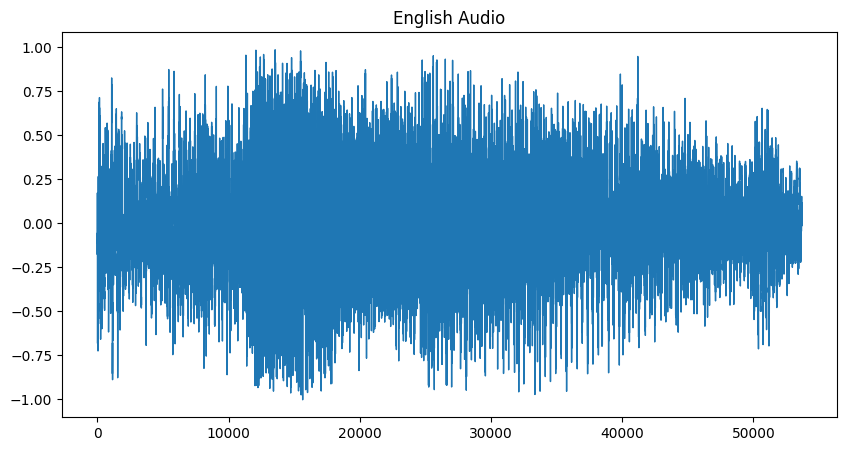

In [61]:
pd.Series(new_df['en_audio'][0]).plot(figsize=(10, 5),
                  lw=1,
                  title='English Audio')
plt.show()

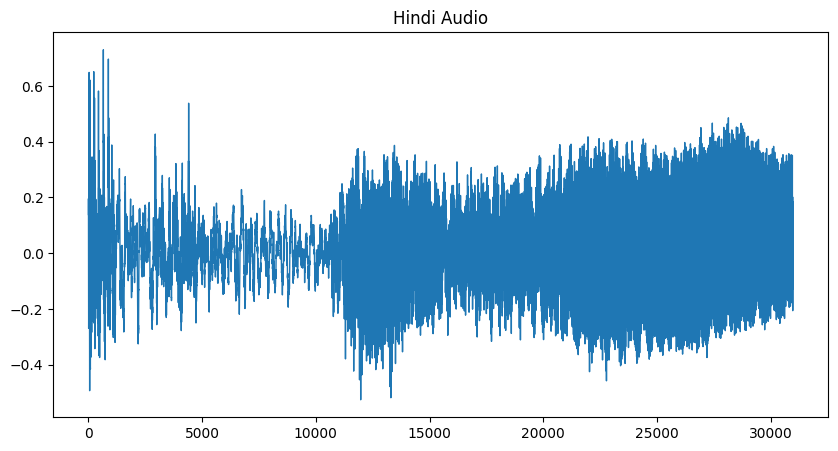

In [62]:
pd.Series(new_df['hi_audio'][0]).plot(figsize=(10, 5),
                  lw=1,
                  title='Hindi Audio')
plt.show()

In [73]:
audio_data_en = new_df['en_audio'][0]
D = librosa.stft(audio_data_en)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 105)

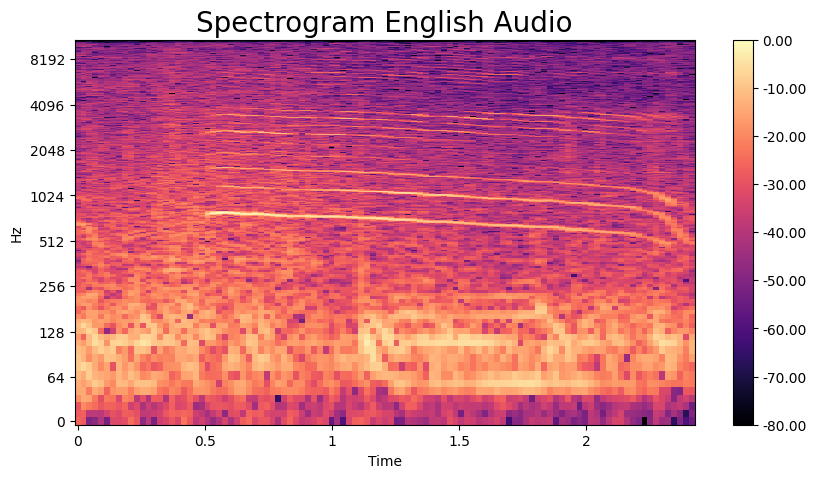

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram English Audio', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')  # Fix typo in colorbar function name
plt.show()

In [75]:
audio_data_hi = new_df['hi_audio'][0]
D = librosa.stft(audio_data_hi)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 61)

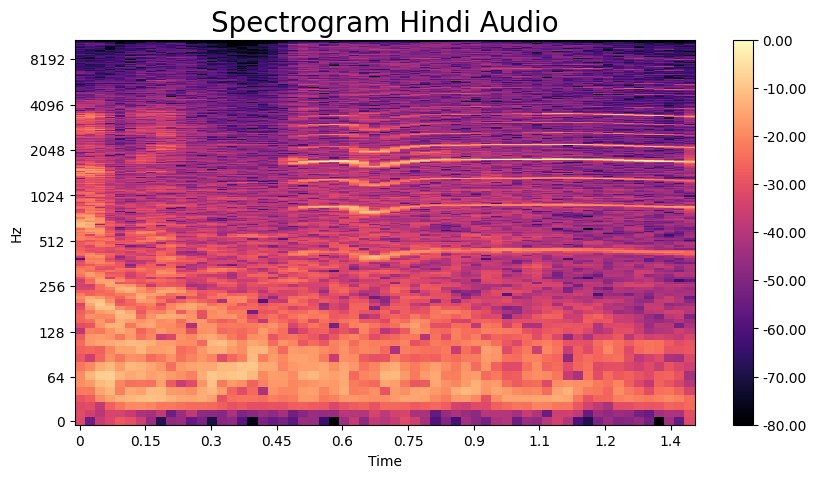

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram Hindi Audio', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')  # Fix typo in colorbar function name
plt.show()

In [77]:
S = librosa.feature.melspectrogram(y=audio_data_en,
                                   sr=SR,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

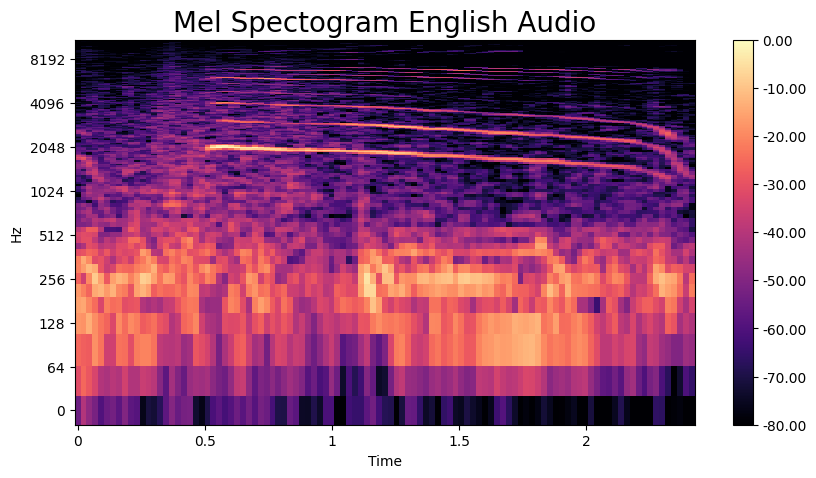

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram English Audio', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [79]:
S = librosa.feature.melspectrogram(y=audio_data_hi,
                                   sr=SR,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

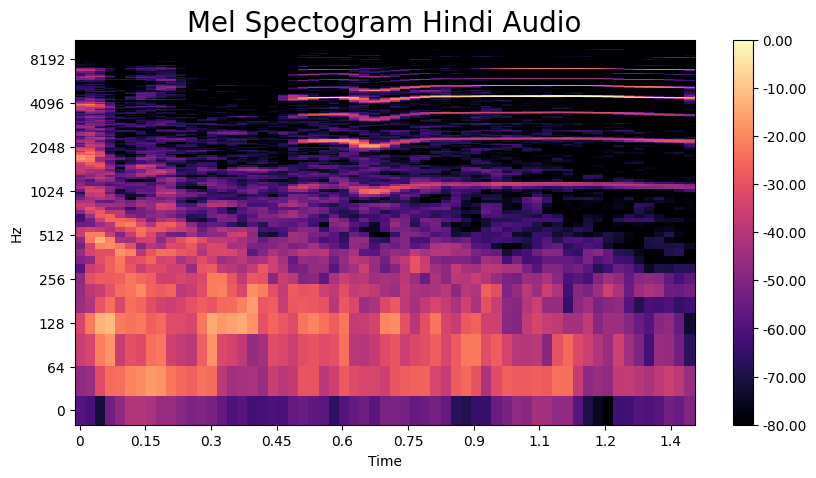

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Hindi Audio', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [101]:
import pandas as pd
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [104]:
def extract_mfcc(audio_data):
    mfcc = librosa.feature.mfcc(y=audio_data, sr=SR, n_mfcc=13)
    return mfcc.T

en_mfcc_features = [extract_mfcc(audio_data) for audio_data in new_df['en_audio']]
hi_mfcc_features = [extract_mfcc(audio_data) for audio_data in new_df['hi_audio']]


In [105]:
# Tokenize text sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['en_text'].values.tolist() + new_df['hi_text'].values.tolist())

en_text_sequences = tokenizer.texts_to_sequences(new_df['en_text'].values)
hi_text_sequences = tokenizer.texts_to_sequences(new_df['hi_text'].values)

In [106]:
max_sequence_length = 100  # Define your sequence length here
en_text_sequences_padded = pad_sequences(en_text_sequences, maxlen=max_sequence_length)
hi_text_sequences_padded = pad_sequences(hi_text_sequences, maxlen=max_sequence_length)


In [107]:
# Split data into train and test sets
en_mfcc_train, en_mfcc_test, hi_mfcc_train, hi_mfcc_test, en_text_train, en_text_test, hi_text_train, hi_text_test = train_test_split(
    en_mfcc_features, hi_mfcc_features, en_text_sequences_padded, hi_text_sequences_padded, test_size=0.2, random_state=42)


In [108]:
# Define the input shapes
input_shape = en_mfcc_train[0].shape
en_text_shape = en_text_sequences_padded.shape[1]
hi_text_shape = hi_text_sequences_padded.shape[1]


In [ ]:
# Define LSTM-based Encoder-Decoder model
encoder_inputs = Input(shape=input_shape)
encoder_lstm = LSTM(128, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]


In [ ]:
decoder_inputs = Input(shape=(None,))  # Define input shape for decoder text sequences
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(len(tokenizer.word_index) + 1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


In [ ]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit([np.array(en_mfcc_train), np.array(en_text_train)], np.array(hi_text_train), epochs=10, batch_size=32, validation_split=0.2)
